In [ ]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('/content/Rainfall.csv')

In [ ]:
df.head(10)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
5,6,1018.8,24.3,20.9,19.2,18.0,84,51,yes,7.7,20.0,14.5
6,7,1021.8,21.4,18.8,17.0,15.0,79,56,no,3.4,30.0,21.5
7,8,1020.8,21.0,18.4,16.5,14.4,78,28,no,7.7,60.0,14.3
8,9,1020.6,18.9,18.1,17.1,14.3,78,79,no,3.3,70.0,39.3
9,10,1017.5,18.5,18.0,17.2,15.5,85,91,yes,0.0,70.0,37.7


In [ ]:
df['rainfall'].count().sum()

366

In [ ]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
df = df.fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  366 non-null    float64
 11  windspeed               366 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
df.head(10)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
5,6,1018.8,24.3,20.9,19.2,18.0,84,51,yes,7.7,20.0,14.5
6,7,1021.8,21.4,18.8,17.0,15.0,79,56,no,3.4,30.0,21.5
7,8,1020.8,21.0,18.4,16.5,14.4,78,28,no,7.7,60.0,14.3
8,9,1020.6,18.9,18.1,17.1,14.3,78,79,no,3.3,70.0,39.3
9,10,1017.5,18.5,18.0,17.2,15.5,85,91,yes,0.0,70.0,37.7


In [ ]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
df.drop(columns=['day', 'dewpoint', 'cloud ', '         winddirection', 'windspeed'], axis=1, inplace=True)

In [ ]:
df.head(10)

,pressure,maxtemp,temparature,mintemp,humidity,rainfall,sunshine
0,1025.9,19.9,18.3,16.8,72,yes,9.3
1,1022.0,21.7,18.9,17.2,81,yes,0.6
2,1019.7,20.3,19.3,18.0,95,yes,0.0
3,1018.9,22.3,20.6,19.1,90,yes,1.0
4,1015.9,21.3,20.7,20.2,95,yes,0.0
5,1018.8,24.3,20.9,19.2,84,yes,7.7
6,1021.8,21.4,18.8,17.0,79,no,3.4
7,1020.8,21.0,18.4,16.5,78,no,7.7
8,1020.6,18.9,18.1,17.1,78,no,3.3
9,1017.5,18.5,18.0,17.2,85,yes,0.0


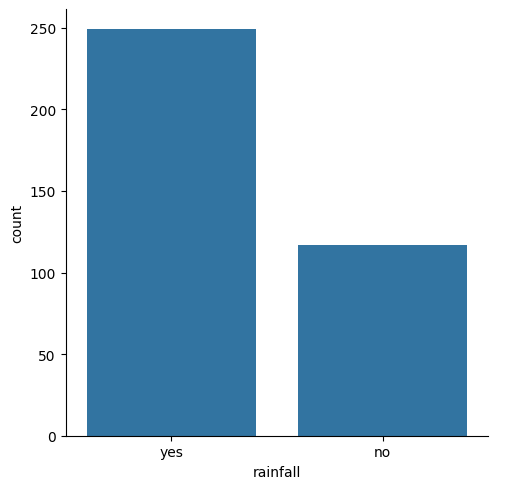

In [ ]:
sns.catplot(x='rainfall', data=df, kind='count')

In [ ]:
df['rainfall'] = df['rainfall'].map({'yes': 1, 'no': 0})

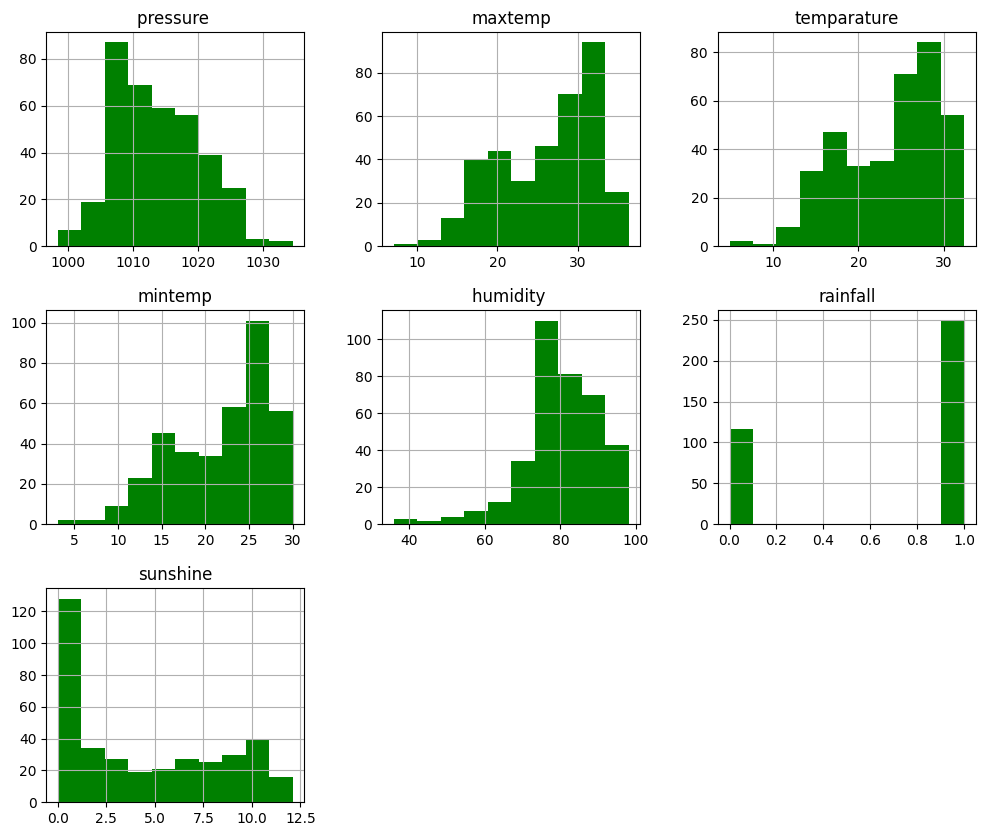

In [ ]:
df.hist(figsize=(12,10), color='green')
plt.show()

In [ ]:
corr = df.corr()

<Axes: >

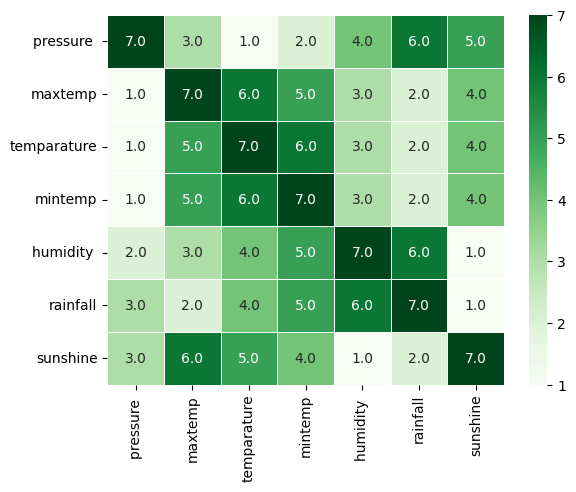

In [ ]:
sns.heatmap(corr.rank(axis='columns'), annot=True,fmt='.1f',linewidth=.5, cmap="Greens")

In [ ]:
X = df.drop('rainfall', axis=1)
y = df['rainfall']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Algorithm = ['RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier','LogisticRegression','Naive Bayes','XGBoost']
Accuracy=[]

In [ ]:
def algorithm(model):
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)

  accuracy = accuracy_score(y_test,prediction)

  print('confusion matrix')
  cm = confusion_matrix(y_test,prediction)


  group_names = ["True Negative","False Positive",'False Negative',"True Positive"]
  group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

  plt.title("Confusion Matrix")
  plt.xlabel('predicted label')
  plt.ylabel('True label')
  plt.show()


  print('Normalized confusion matrix')
  cm1 = confusion_matrix(y_test,prediction, normalize='true')

  group_names = ["True Negative","False Positive",'False Negative',"True Positive"]
  group_counts = ['{0:0.0f}'.format(value) for value in cm1.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cm1.flatten()/np.sum(cm1)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

  plt.title("Confusion Matrix")
  plt.xlabel('predicted label')
  plt.ylabel('True label')
  plt.show()

  print(cm)
  print(classification_report(y_test,prediction))
  final_score = accuracy*100
  print('accuracy_score : ' , final_score)

  Accuracy.append(accuracy*100)

confusion matrix


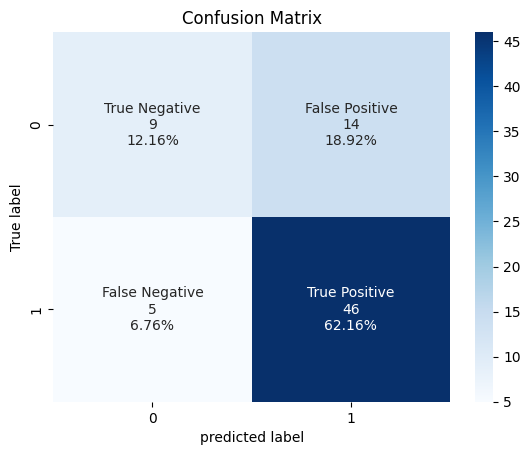

Normalized confusion matrix


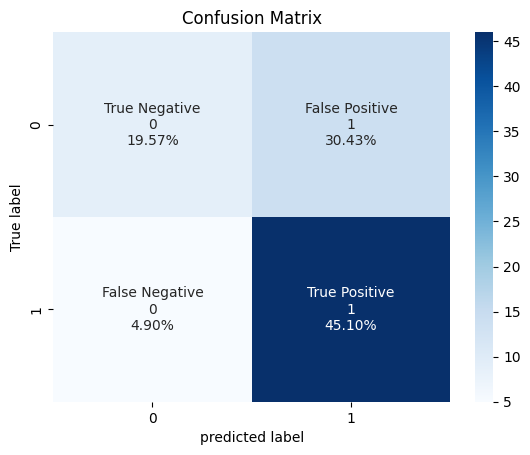

[[ 9 14]
 [ 5 46]]
              precision    recall  f1-score   support

           0       0.64      0.39      0.49        23
           1       0.77      0.90      0.83        51

    accuracy                           0.74        74
   macro avg       0.70      0.65      0.66        74
weighted avg       0.73      0.74      0.72        74

accuracy_score :  74.32432432432432


In [ ]:
model_1 = RandomForestClassifier(n_estimators=100)
algorithm(model_1)

confusion matrix


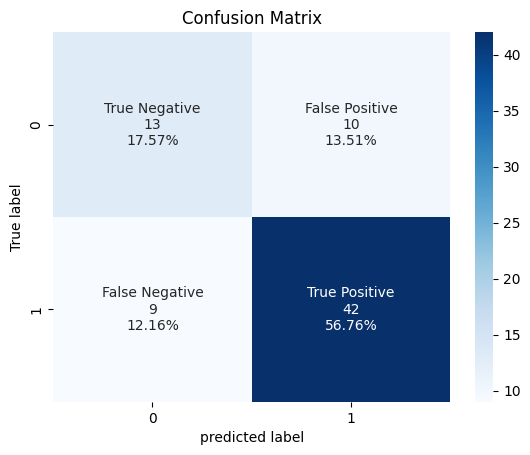

Normalized confusion matrix


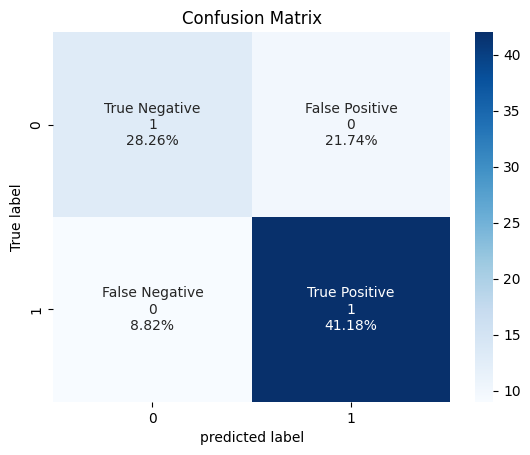

[[13 10]
 [ 9 42]]
              precision    recall  f1-score   support

           0       0.59      0.57      0.58        23
           1       0.81      0.82      0.82        51

    accuracy                           0.74        74
   macro avg       0.70      0.69      0.70        74
weighted avg       0.74      0.74      0.74        74

accuracy_score :  74.32432432432432


In [ ]:
model_2 = DecisionTreeClassifier(random_state=42)
algorithm(model_2)

confusion matrix


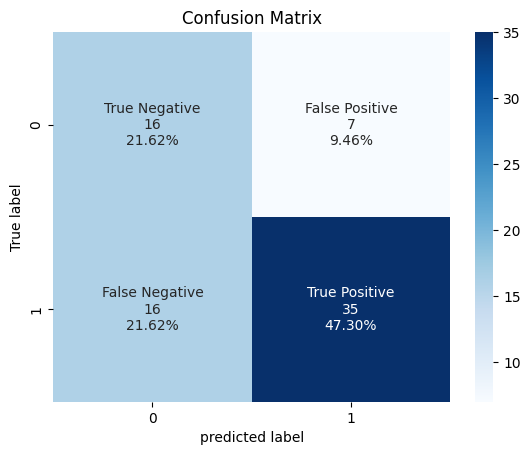

Normalized confusion matrix


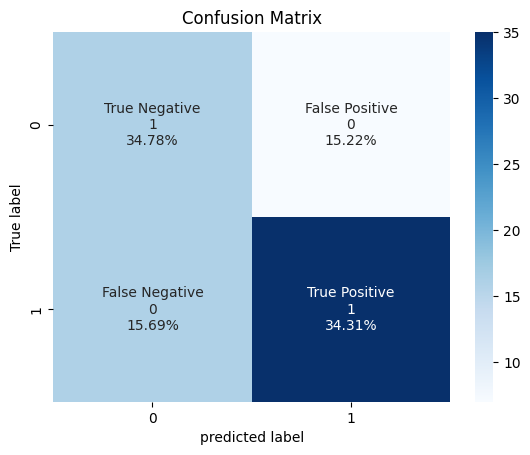

[[16  7]
 [16 35]]
              precision    recall  f1-score   support

           0       0.50      0.70      0.58        23
           1       0.83      0.69      0.75        51

    accuracy                           0.69        74
   macro avg       0.67      0.69      0.67        74
weighted avg       0.73      0.69      0.70        74

accuracy_score :  68.91891891891892


In [ ]:
model_3 = KNeighborsClassifier(n_neighbors=2)
algorithm(model_3)

confusion matrix


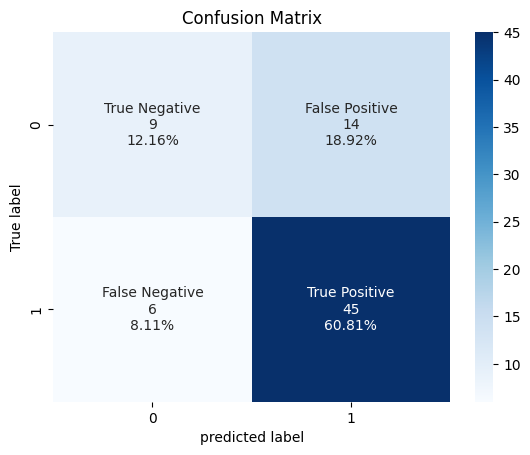

Normalized confusion matrix


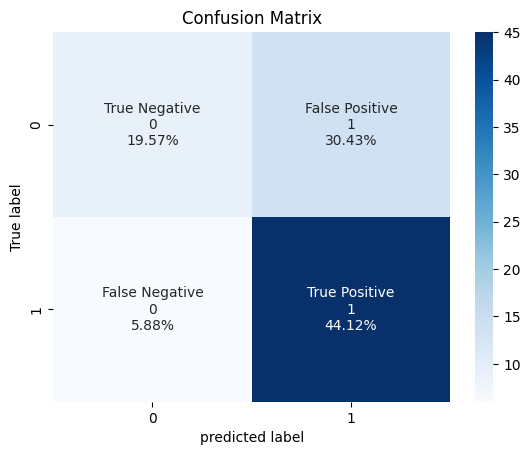

[[ 9 14]
 [ 6 45]]
              precision    recall  f1-score   support

           0       0.60      0.39      0.47        23
           1       0.76      0.88      0.82        51

    accuracy                           0.73        74
   macro avg       0.68      0.64      0.65        74
weighted avg       0.71      0.73      0.71        74

accuracy_score :  72.97297297297297


In [ ]:
model_4 = LogisticRegression()
algorithm(model_4)

confusion matrix


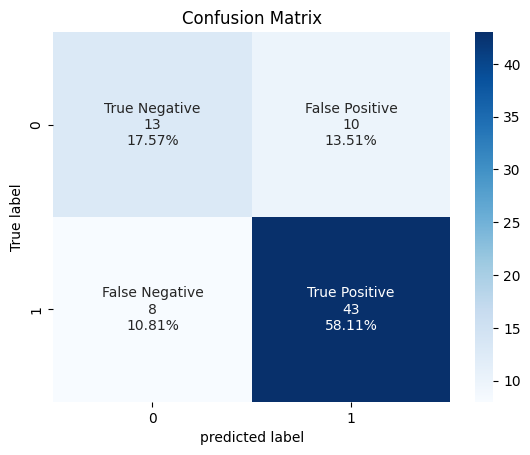

Normalized confusion matrix


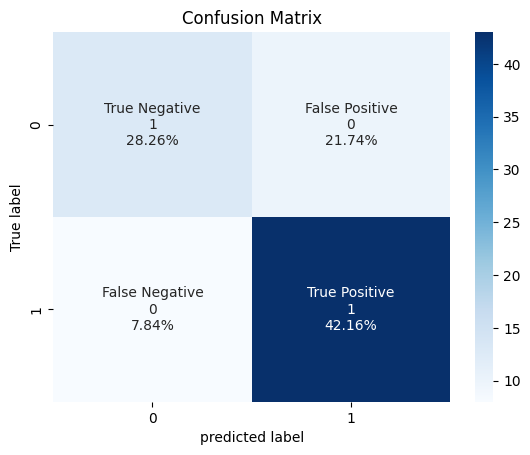

[[13 10]
 [ 8 43]]
              precision    recall  f1-score   support

           0       0.62      0.57      0.59        23
           1       0.81      0.84      0.83        51

    accuracy                           0.76        74
   macro avg       0.72      0.70      0.71        74
weighted avg       0.75      0.76      0.75        74

accuracy_score :  75.67567567567568


In [ ]:
model_5 = GaussianNB()
algorithm(model_5)

confusion matrix


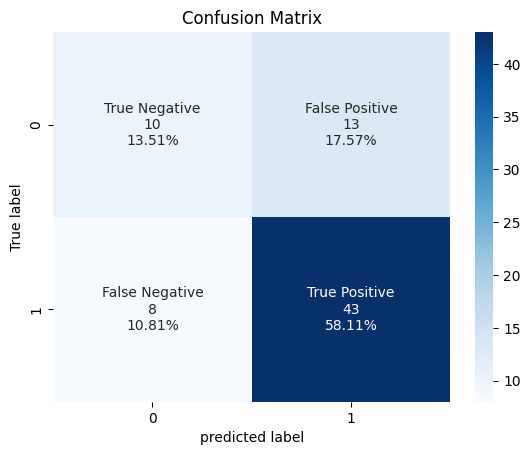

Normalized confusion matrix


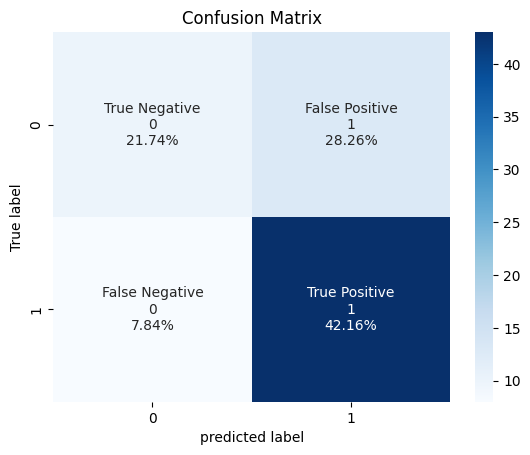

[[10 13]
 [ 8 43]]
              precision    recall  f1-score   support

           0       0.56      0.43      0.49        23
           1       0.77      0.84      0.80        51

    accuracy                           0.72        74
   macro avg       0.66      0.64      0.65        74
weighted avg       0.70      0.72      0.71        74

accuracy_score :  71.62162162162163


In [ ]:
model_6 = xgb.XGBClassifier()
algorithm(model_6)

In [ ]:
score = pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy })
score

,Algorithm,Accuracy
0,RandomForestClassifier,74.324324
1,DecisionTreeClassifier,74.324324
2,KNeighborsClassifier,68.918919
3,LogisticRegression,72.972973
4,Naive Bayes,75.675676
5,XGBoost,71.621622


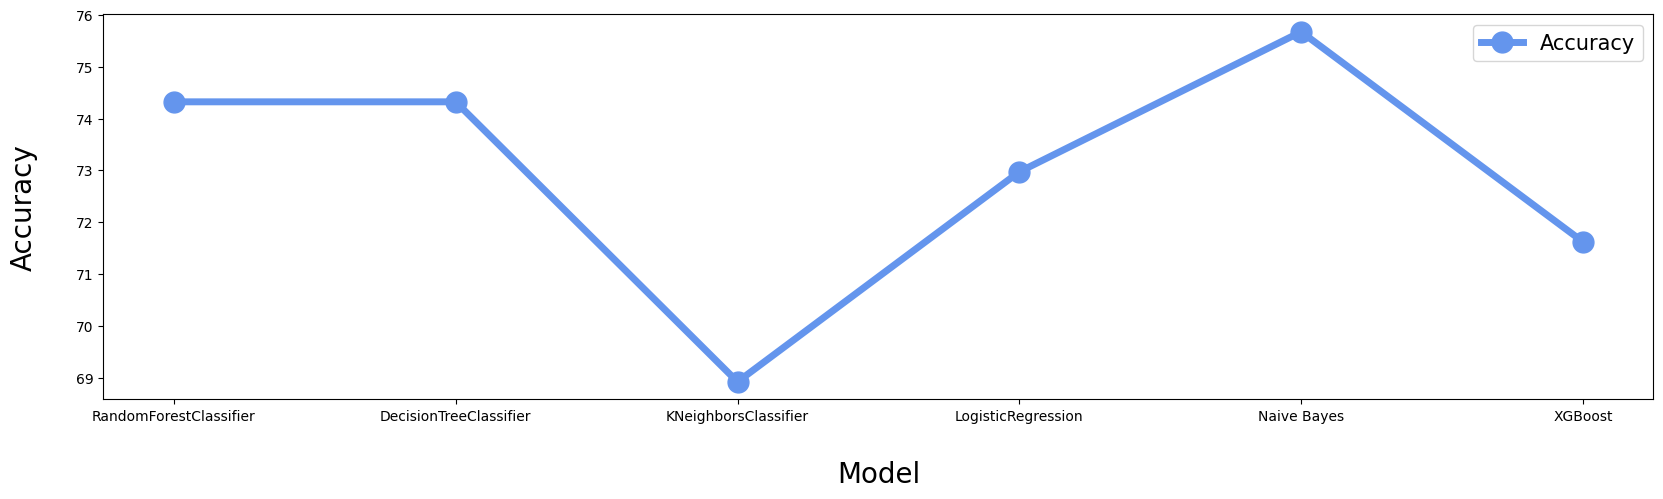

In [ ]:
fig = plt.figure(figsize=(20,5))
plt.plot(score.Algorithm,score.Accuracy,label='Accuracy',lw=5,color='CornflowerBlue',marker='o',markersize = 15)
plt.legend(fontsize=15)
plt.xlabel('\nModel',fontsize= 20)
plt.ylabel('Accuracy\n',fontsize= 20)
plt.show()

In [ ]:
test_input = [[1005, 25, 22, 18, 85, 2]]

In [ ]:
rainfall_prediction = model_5.predict(test_input)

In [ ]:
rainfall_prediction

array([1])

In [ ]:
import pickle

In [ ]:
with open('rain_prediction_model.pkl', 'wb') as file:
    pickle.dump(model_5, file)